In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y =load_diabetes(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

____________________________

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((331, 10), (111, 10), (331,), (111,))

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [5]:
def MSE(target_labels,predicted_labels):
    return np.sum((predicted_labels-target_labels)**2)/len(target_labels)

In [6]:
def gb_residual(target_labels,predicted_labels):
    return -(predicted_labels-target_labels)

In [7]:
def gb_predict(dataset,tree_list,eta):
    predictions=np.zeros(dataset.shape[0])

    for tree in tree_list:
        predictions=predictions+eta*tree.predict(dataset)
        
    return predictions

In [8]:
def gb_fit_2(number_of_trees,max_depth,X_train,X_test,y_train,y_test,eta):
    tree_list=[]
    MSE_train=[]
    MSE_test=[]
    MSE_train_dict={}
    MSE_test_dict={}

    
    
    for i in range(number_of_trees+1):
        tree=DecisionTreeRegressor(max_depth=max_depth,random_state=42)
        
        predictions_train=gb_predict(X_train,tree_list,eta)
        predictions_test=gb_predict(X_test,tree_list,eta)
        
        error_train=MSE(y_train,predictions_train)
        error_test=MSE(y_test,predictions_test)
        
        MSE_train.append(error_train)
        MSE_test.append(error_test)
        
        residual=gb_residual(y_train,predictions_train)
        tree.fit(X_train,residual)
        
        tree_list.append(tree)
    
    MSE_train_dict['MSE_train']=MSE_train
    MSE_test_dict['MSE_test']=MSE_test
    
    return MSE_train_dict,MSE_test_dict

In [9]:
def plot_charts(values):
    fig,ax=plt.subplots(nrows=9,ncols=1)
    fig.set_size_inches(len(values),len(values)*5)

    
    ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8=ax
    
    depth='depth'
    
    ax0.plot(values[0]['values'][0]['MSE_train'])
    ax0.plot(values[0]['values'][1]['MSE_test'])
    ax0.legend(['MSE_train','MSE_test'])
    ax0.set_title(f'trees:{values[0]["trees"]} , depth:{values[0][depth]} ')
    
    ax1.plot(values[1]['values'][0]['MSE_train'])
    ax1.plot(values[1]['values'][1]['MSE_test'])
    ax1.legend(['MSE_train','MSE_test'])
    ax1.set_title(f'trees:{values[1]["trees"]} , depth:{values[1][depth]} ')
    
    ax2.plot(values[2]['values'][0]['MSE_train'])
    ax2.plot(values[2]['values'][1]['MSE_test'])
    ax2.legend(['MSE_train','MSE_test'])
    ax2.set_title(f'trees:{values[2]["trees"]} , depth:{values[2][depth]} ')
    
    ax3.plot(values[3]['values'][0]['MSE_train'])
    ax3.plot(values[3]['values'][1]['MSE_test'])
    ax3.legend(['MSE_train','MSE_test'])
    ax3.set_title(f'trees:{values[3]["trees"]} , depth:{values[3][depth]} ')
    
    ax4.plot(values[4]['values'][0]['MSE_train'])
    ax4.plot(values[4]['values'][1]['MSE_test'])
    ax4.legend(['MSE_train','MSE_test'])
    ax4.set_title(f'trees:{values[4]["trees"]} , depth:{values[4][depth]} ')
    
    ax5.plot(values[5]['values'][0]['MSE_train'])
    ax5.plot(values[5]['values'][1]['MSE_test'])
    ax5.legend(['MSE_train','MSE_test'])
    ax5.set_title(f'trees:{values[5]["trees"]} , depth:{values[5][depth]} ')

    ax6.plot(values[6]['values'][0]['MSE_train'])
    ax6.plot(values[6]['values'][1]['MSE_test'])
    ax6.legend(['MSE_train','MSE_test'])
    ax6.set_title(f'trees:{values[6]["trees"]} , depth:{values[6][depth]} ')
    
    ax7.plot(values[7]['values'][0]['MSE_train'])
    ax7.plot(values[7]['values'][1]['MSE_test'])
    ax7.legend(['MSE_train','MSE_test'])
    ax7.set_title(f'trees:{values[7]["trees"]} , depth:{values[7][depth]} ')
    
    ax8.plot(values[8]['values'][0]['MSE_train'])
    ax8.plot(values[8]['values'][1]['MSE_test'])
    ax8.legend(['MSE_train','MSE_test'])
    ax8.set_title(f'trees:{values[8]["trees"]} , depth:{values[8][depth]} ')

In [10]:
def parameters_selection(X_train,X_test,y_train,y_test,eta,number_of_trees_list,max_depth_list):
    result_list=[]
    for t in number_of_trees_list:
        for d in max_depth_list:
            result={}
            result['trees']=t
            result['depth']=d
            result['values']=gb_fit_2(t,d,X_train,X_test,y_train,y_test,eta)
            result_list.append(result)
    
    
    return plot_charts(result_list)

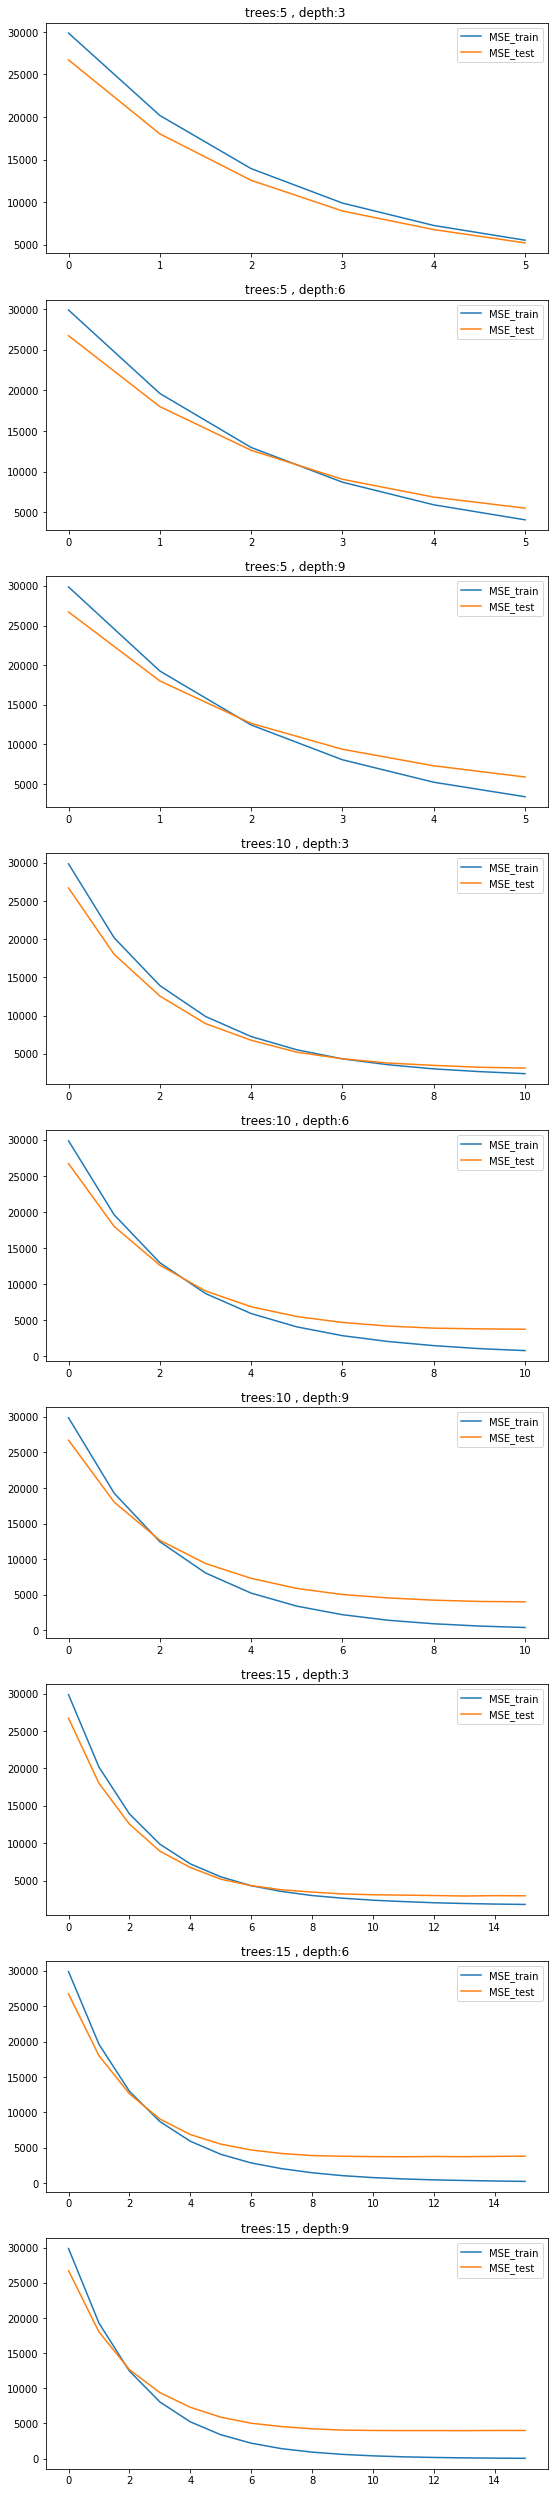

In [11]:
parameters_selection(X_train,X_test,y_train,y_test,0.2,[5,10,15],[3,6,9])

Вывод: с ростом количества деревьев при сохранении их глубины ускоряется сближение графиков ошибок тренировочной и тестовой выборок. Рост глубины деревьев почти не влияет на график ошибки тренировочной выборки, при этом график ошибки тестовой выборки ускоряет переход к виду прямой параллельной оси OX

2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [12]:
def MSE_stochastic(target_labels,predicted_labels):
    return np.sum((predicted_labels-target_labels)**2)/len(target_labels)

In [13]:
def gb_predict_stochastic(dataset,tree_list,eta):
    predictions=np.zeros(dataset.shape[0])

    for tree in tree_list:
        predictions=predictions+eta*tree.predict(dataset)
        
    return predictions

In [14]:
def gb_residual_stochastic(target_labels,predicted_labels):
    return -(predicted_labels-target_labels)

In [15]:
def create_dataset(X_train,X_test,y_train,y_test):
    redo_list_train=[X_train,y_train]
    redo_list_test=[X_test,y_test]
    
    cut=np.around(len(y_train)*0.5)
    
    index_list_train=np.random.choice(np.random.permutation([i for i in range(len(y_train))]),int(cut))
    index_list_test=np.random.choice(np.random.permutation([i for i in range(len(y_test))]),int(cut))

    list_of_new_arrays_train=[]
    list_of_new_arrays_test=[]
    
    for narray in redo_list_train:
        new_narray=[]
        for index in index_list_train:
            new_narray.append(narray[index])
        new_narray=np.array(new_narray)
        list_of_new_arrays_train.append(new_narray)
        
    for narray in redo_list_test:
        new_narray=[]
        for index in index_list_test:
            new_narray.append(narray[index])
        new_narray=np.array(new_narray)
        list_of_new_arrays_test.append(new_narray)
    
    return list_of_new_arrays_train[0],list_of_new_arrays_test[0],list_of_new_arrays_train[1],list_of_new_arrays_test[1]

In [16]:
def gb_fit_stochastic(number_of_trees,max_depth,X_train,X_test,y_train,y_test,eta):
    tree_list=[]
    MSE_train=[]
    MSE_test=[]
    MSE_train_dict={}
    MSE_test_dict={}
    
    
    for i in range(number_of_trees+1):
        tree=DecisionTreeRegressor(max_depth=max_depth,random_state=42)
        
        X_train_updated,X_test_updated,y_train_updated,y_test_updated=create_dataset(X_train,X_test,y_train,y_test)
        
        predictions_train=gb_predict_stochastic(X_train_updated,tree_list,eta)
        predictions_test=gb_predict_stochastic(X_test_updated,tree_list,eta)
        
        error_train=MSE_stochastic(y_train_updated,predictions_train)
        error_test=MSE_stochastic(y_test_updated,predictions_test)
        
        MSE_train.append(error_train)
        MSE_test.append(error_test)
        
        residual=gb_residual_stochastic(y_train_updated,predictions_train)
        tree.fit(X_train_updated,residual)
        
        tree_list.append(tree)
    
    MSE_train_dict['MSE_train']=MSE_train
    MSE_test_dict['MSE_test']=MSE_test
    
    return MSE_train_dict,MSE_test_dict

In [17]:
def plot_charts_stochastic(values):
    
    plt.figure(figsize=(15,15))
    plt.plot(range(values[0]['trees']+1),values[0]['values'][1]['MSE_test'])
    plt.plot(range(values[1]['trees']+1),values[1]['values'][1]['MSE_test'])
    plt.plot(range(values[2]['trees']+1),values[2]['values'][1]['MSE_test'])
    plt.plot(range(values[3]['trees']+1),values[3]['values'][1]['MSE_test'])
    plt.legend(['5 - деревьев','10 - деревьев','15 - деревьев','20 - деревьев'])

In [18]:
def parameters_selection(X_train,X_test,y_train,y_test,eta,number_of_trees_list,max_depth_list):
    result_list=[]
    for t in number_of_trees_list:
        for d in max_depth_list:
            result={}
            result['trees']=t
            result['depth']=d
            result['values']=gb_fit_stochastic(t,d,X_train,X_test,y_train,y_test,eta)
            result_list.append(result)
    
    return plot_charts_stochastic(result_list)

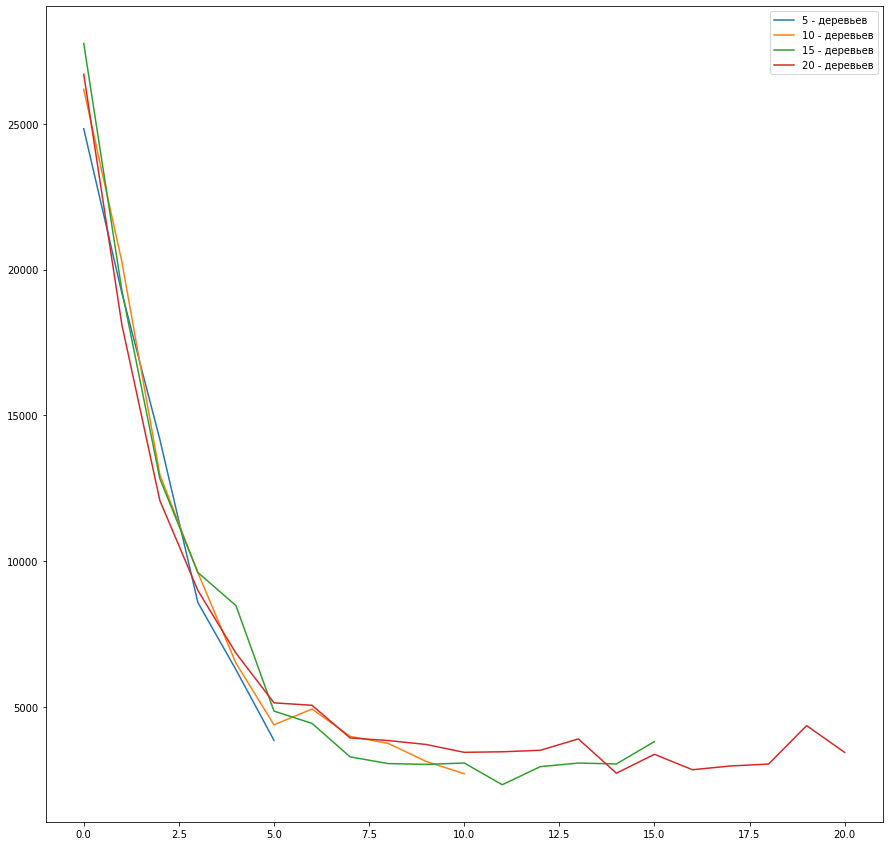

In [19]:
parameters_selection(X_train,X_test,y_train,y_test,0.2,[5,10,15,20],[3])

Вывод: с увеличением количества деревьев стохастический градиентный бустинг дольше ведет себя "ровнее"(более гладкие колебания ошибки) до определенного уровня ошибки, при этом наблюдается относительно высокая скорость убывания ошибки. После данного уровня сокращается скорость убывания ошибки, при этом колебания увеличиваются.